## Sampling a 4-dimensional MultiVariate Normal distribution (MVN) via the ParaMonte library's ParaDRAM routine    

The logic of Monte Carlo sampling is very simple: You have a mathematical objective function defined on an n-dimensional domain (of typically real numbers). In general, understanding and visualizing the structure of such objective functions is an extremely difficult task, if not impossible. As a better alternative, you employ Monte Carlo techniques that can randomly explore the structure of the objective function and find the function's extrema.  

In the following example below, an example of one of the simplest such objective functions, the **Multivariate Normal Distribution (MVN)**, is constructed and sampled using the ParaMonte library samplers, here, the **ParaDRAM** sampler (**Delayed-Rejection Adaptive Metropolis-Hastings Markov Chain Monte Carlo sampler**).  

Suppose we want to sample a random points from a [multivariate Normal Probability Density Function (PDF)](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). 

The following Python function `getLogFunc()` returns the natural logarithm of the Probability Density Function of the multivariate Normal PDF.  

In [21]:
# activate interative plotting in Jupyter environment
%matplotlib notebook

In [2]:
import numpy as np
from scipy.stats import multivariate_normal

NDIM = 4 # number of dimensions of the domain of the objective function MVN

mvn = multivariate_normal   ( mean =  [0.0,0.0,0.0,0.0]
                            , cov = [ [1.0,.45,-.3,0.0]
                                    , [.45,1.0,0.3,-.2]
                                    , [-.3,0.3,1.0,0.6]
                                    , [0.0,-.2,0.6,1.0]
                                    ]
                            )

def getLogFunc(point):
    return np.log(mvn.pdf(point))

> Since the mathematical objective functions (e.g., probability density functions) can take extremely small or large values, we often work with their natural logarithms of the objective functions instead of the objective function itself. This is the reason behind the naming convention used in the ParaMonte library for the user's objective functions: **getLogFunc**, indicating that the user must provide a function that returns the natural logarithm of the target objective function.  

We will sample random points from this objective function by calling the **ParaDRAM** sampler (**Delayed-Rejection Adaptive Metropolis-Hastings Markov Chain Monte Carlo sampler**) of the ParaMonte library.  

>**To run the sampler in parallel**, you will have to first save the MPI-enabled script as an external file (see below). Visit the [ParaMonte library's documentation website](http://cdslab.org/paramonte/notes/run/python/) for more information.

In [3]:
import paramonte as pm
pmpd = pm.ParaDRAM() # define a ParaMonte sampler instance

The simplest scenario would be to run the simulation with the default specifications that are appropriately determined by the ParaDRAM sampler via the specification variable `startPointVec`. But to make our simulation a bit more interesting, we will intentionally set the starting point for the MCMC sampler, slightly off of the peak of the MVN PDF.

In [4]:
pmpd.spec.startPointVec = [-10, 15, 20, 0]
# run the ParaDRAM sampler
pmpd.runSampler ( ndim = 4
                , getLogFunc = getLogFunc
                )


ParaDRAM - NOTE: Running ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run ParaDRAM sampler in parallel mode visit: cdslab.org/pm
ParaDRAM - NOTE: If you are using Jupyter notebook, check Jupyter's terminal window
ParaDRAM - NOTE: for simulation progress and report.


ParaDRAM - NOTE: To read the generated output files sample or chain files, try the following:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output sample file. 
ParaDRAM - NOTE:     pmpd.readChain()       # to read the uniquely-accepted points from the output chain file. 
ParaDRAM - NOTE:     pmpd.readMarkovChain() # to read the Markov Chain. Not recommended for extremely-large chains.
ParaDRAM - NOTE: 
ParaDRAM - NOTE: Replace 'pmpd' with the name you are using for your ParaDRAM object.
ParaDRAM - NOTE: For more information and examples on the usage, visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte/



This will print the simulation progress information on your **Anaconda** prompt window (not inside your Jupyter notebook). Upon finishing the simulation, we can read the generated output sample.

In [5]:
pmpd.readSample()


ParaDRAM - WARNING: delimiter is neither given as input nor set as a ParaDRAM object property.
ParaDRAM - WARNING: This information is essential for successful reading of the requested sample file(s).
ParaDRAM - WARNING: Proceeding with the default assumtion of comma-delimited sample file contents...

ParaDRAM - NOTE: 1 files detected matching the pattern: "D:\Dropbox\Projects\20180101_ParaMonte\git\example\jupyter\ParaDRAM_run_20200330_010139_686*_sample.txt"
ParaDRAM - NOTE: processing file: D:\Dropbox\Projects\20180101_ParaMonte\git\example\jupyter\ParaDRAM_run_20200330_010139_686_process_1_sample.txt
ParaDRAM - NOTE: reading file contents... done in 0.078211 seconds.
ParaDRAM - NOTE: parsing file contents... done in 0.0 seconds.
ParaDRAM - NOTE: computing sample correlation matrix... done in 0.011022 seconds.
ParaDRAM - NOTE: computing sample covariance matrix... done in 0.016042 seconds.
ParaDRAM - NOTE: computing autocorrelations... done in 0.247175 seconds.
ParaDRAM - NOTE: add

To quickly visualize the generated sample as a histogram, try,

<IPython.core.display.Javascript object>


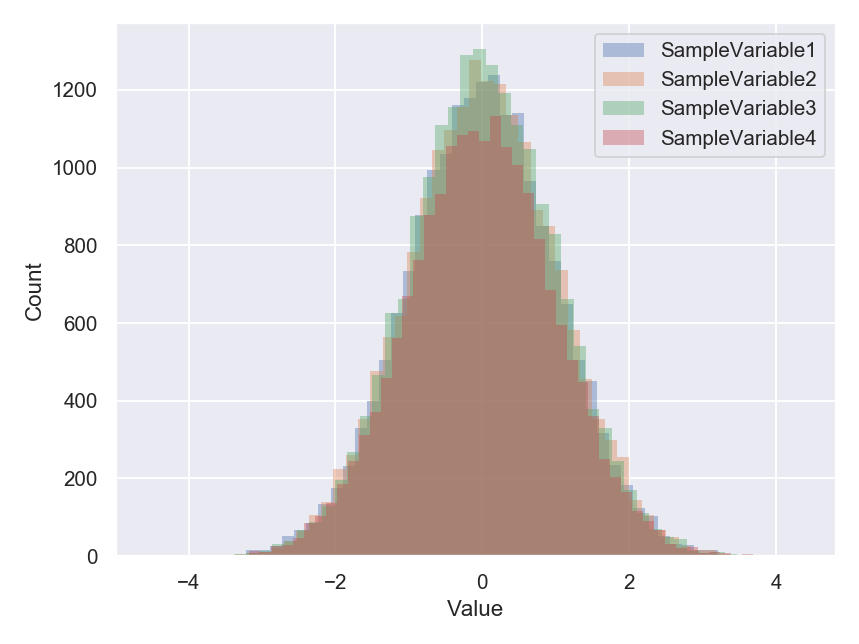

In [6]:
pmpd.sampleList[0].plot.hist()

If the variable names are specified for the sampler before runnign the simulations, the sampler will automatically assign names to each variable. To change the x-label, for example, you can try,

<IPython.core.display.Javascript object>


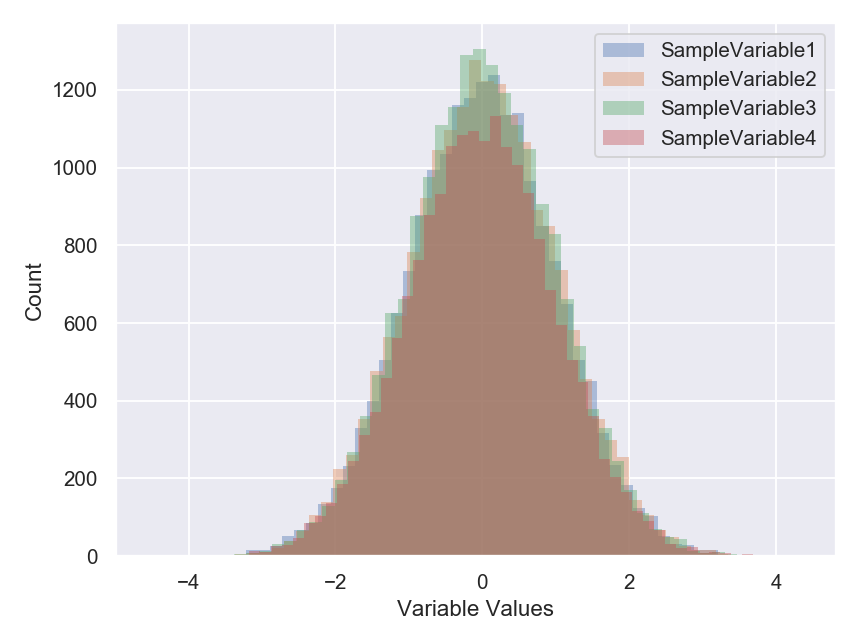

Text(0.5, 31.07499999999998, 'Variable Values')

In [7]:
pmpd.sampleList[0].plot.hist()
pmpd.sampleList[0].plot.hist.currentFig.axes.set_xlabel("Variable Values")

To make a trace-plot of the sample, try,  

<IPython.core.display.Javascript object>


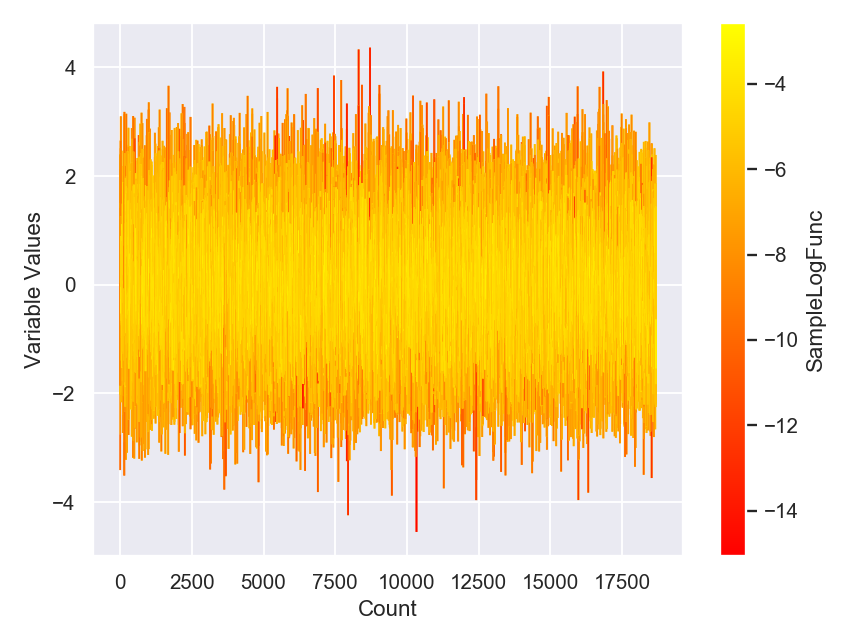

In [8]:
pmpd.sampleList[0].plot.line()

To change the scale of the x-axis, try,  

<IPython.core.display.Javascript object>


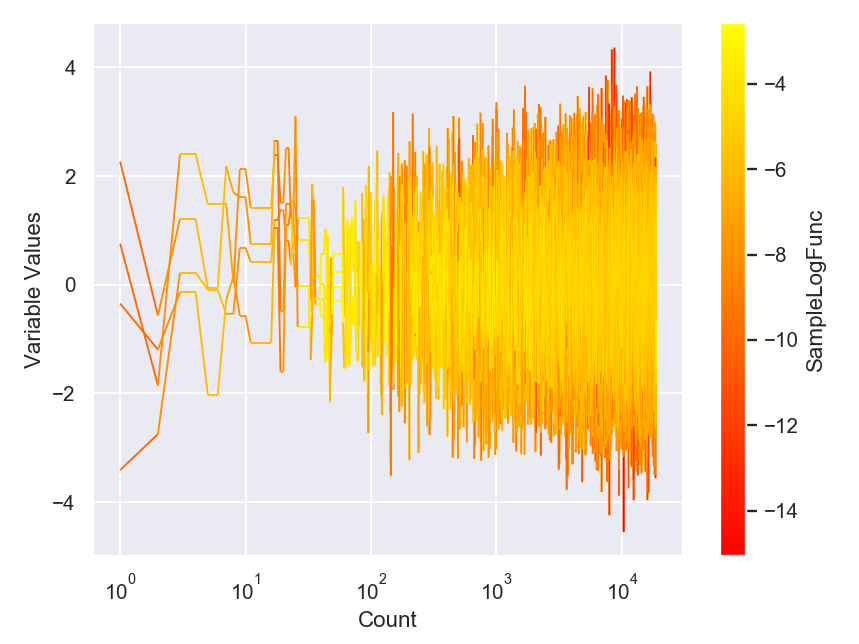

In [9]:
pmpd.sampleList[0].plot.line()
pmpd.sampleList[0].plot.line.currentFig.axes.set_xscale("log")

By default, the color of the line in the trace-plot will represent the value returned by `getLogFunc()` at the given sampled point. To turn the color off, you can instead try,

In [10]:
pmpd.sampleList[0].plot.line.ccolumns

'SampleLogFunc'

<IPython.core.display.Javascript object>


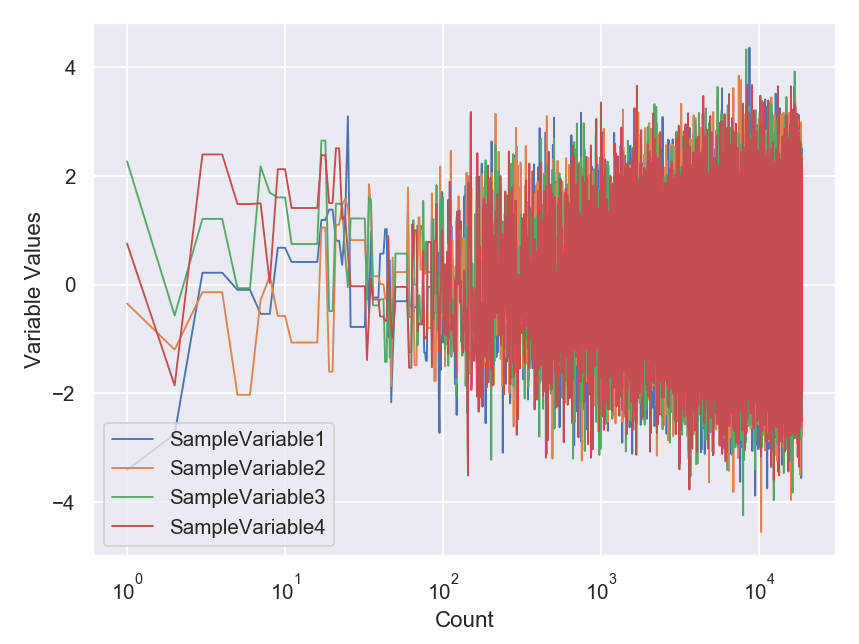

In [11]:
pmpd.sampleList[0].plot.line.ccolumns = None
pmpd.sampleList[0].plot.line()
pmpd.sampleList[0].plot.line.currentFig.axes.set_xscale("log")

There are many other properties of the plot that can be set or modified via the attributes of the `pmpd.sampleList[0].plot.line` object. To see them all, see the documentaiton of the object via `help(pmpd.sampleList[0].plot.line)`,

To make a scatter trace-plot of the sampled points, try,

<IPython.core.display.Javascript object>


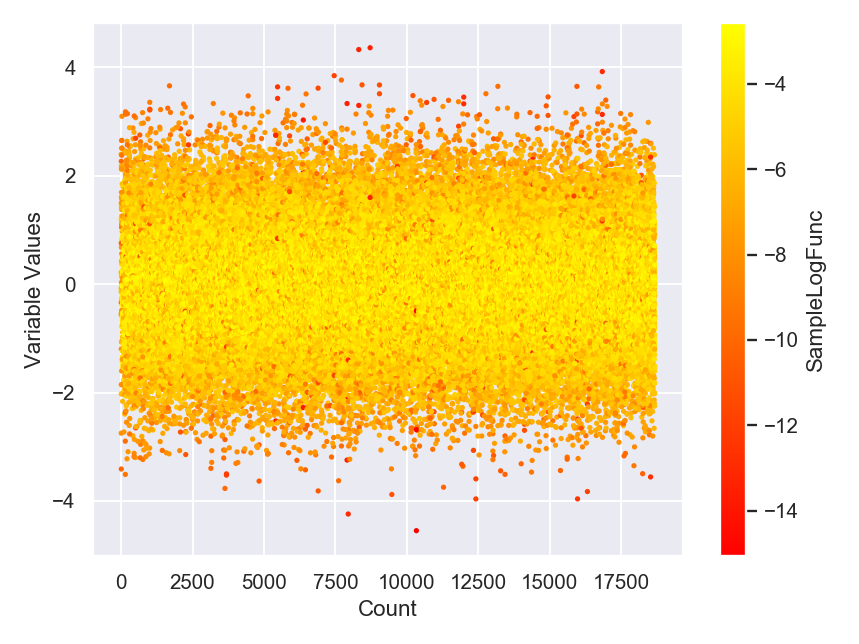

In [12]:
pmpd.sampleList[0].plot.scatter()

Setting or modifying the properties of the scatter plot are identical to the line plot. By default, the sampler makes a scatter plot of all of the sampled variables on top of each other as a function of their order in the sample file. To make the plot more meaning fule, you want to plot individual variables against each other. For example, to make scatter plots of all variables against the `logFunc`, 

In [13]:
variables = pmpd.sampleList[0].plot.scatter.ycolumns.values
variables

array(['SampleVariable1', 'SampleVariable2', 'SampleVariable3',
       'SampleVariable4'], dtype=object)

<IPython.core.display.Javascript object>


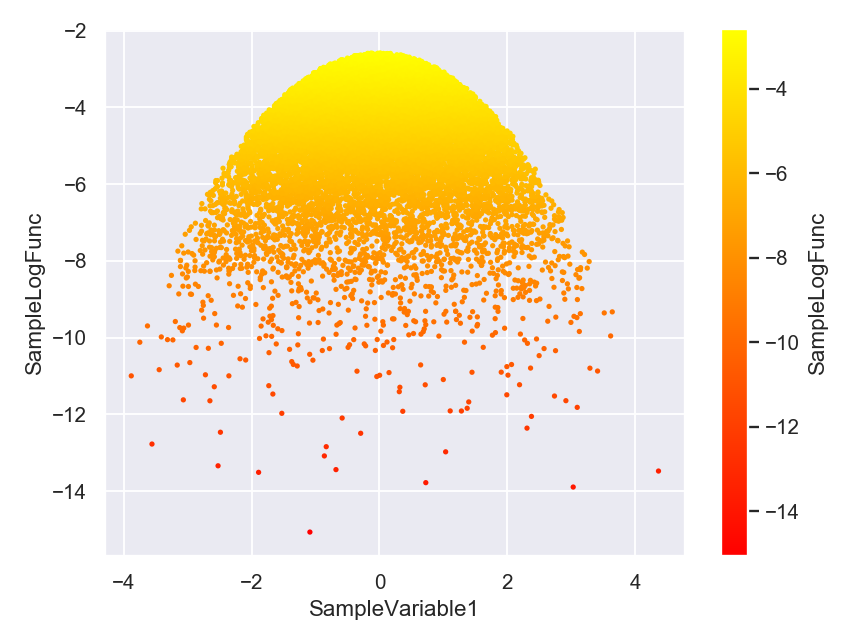

<IPython.core.display.Javascript object>


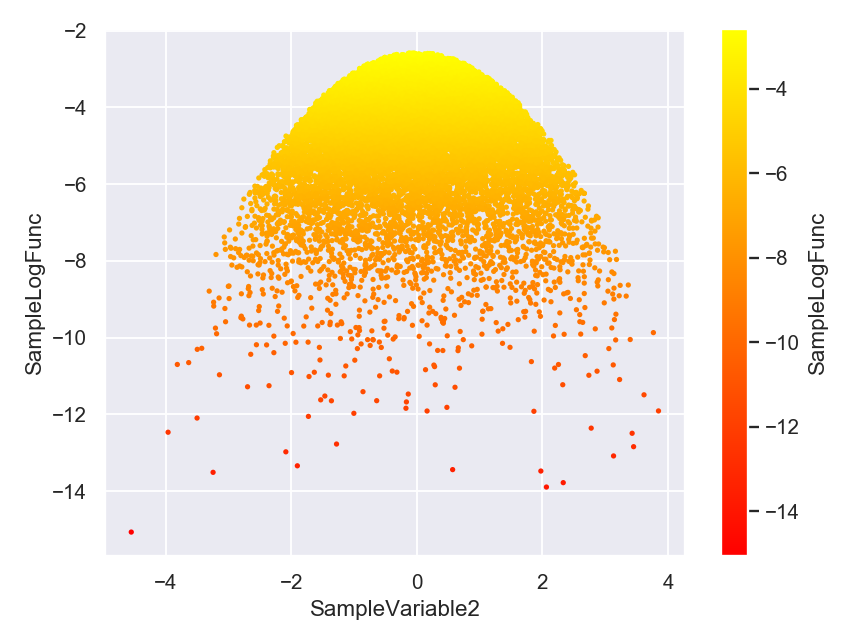

<IPython.core.display.Javascript object>


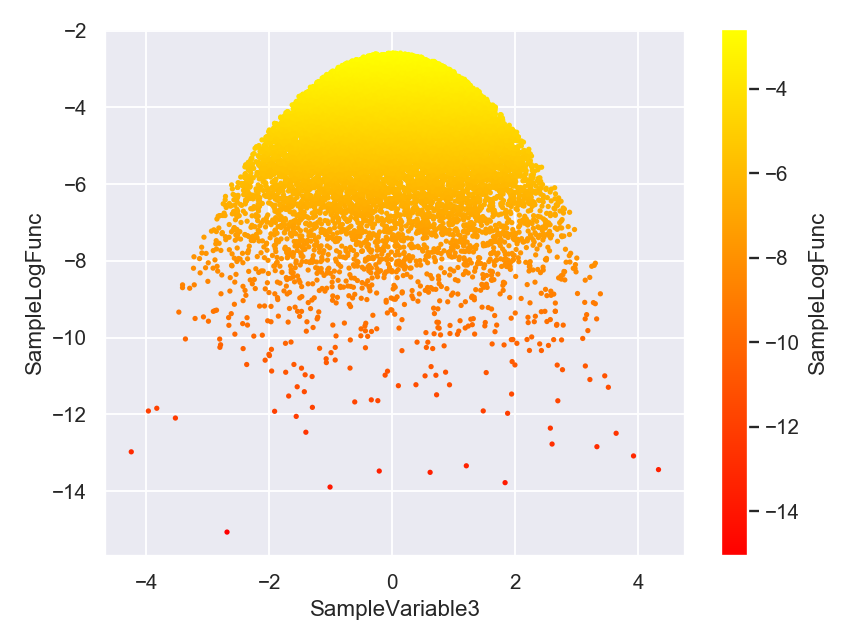

<IPython.core.display.Javascript object>


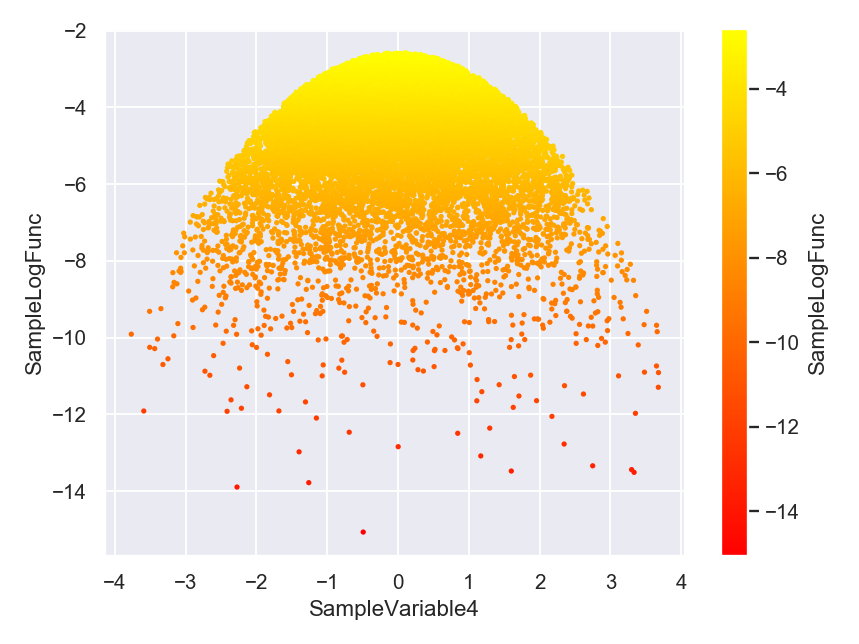

In [14]:
pmpd.sampleList[0].plot.scatter.ycolumns = "SampleLogFunc"
for variable in variables:
    pmpd.sampleList[0].plot.scatter.xcolumns = variable
    pmpd.sampleList[0].plot.scatter()

To make kernel density plots of the sampled points, try (**WARNING**: 2D-kernel density estimates are computationally demanding and depending on the capabilities of your computer may take a long while to finish),

<IPython.core.display.Javascript object>


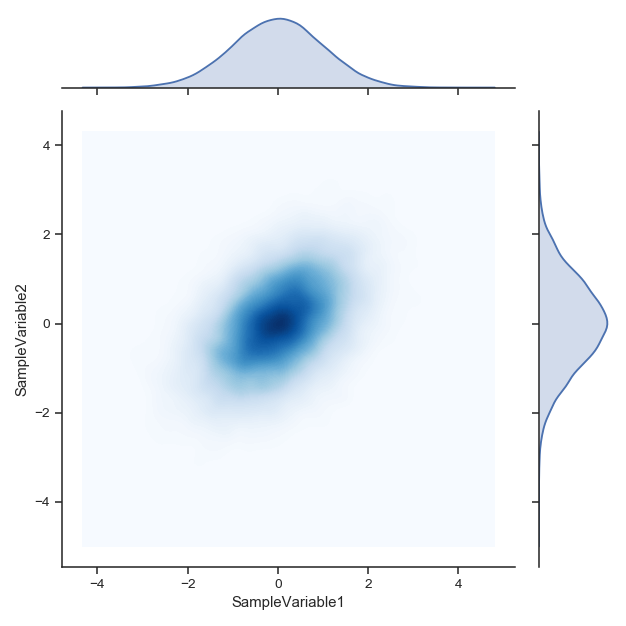

In [15]:
pmpd.sampleList[0].plot.density()

By default, the kernel density plot displays `SampleVariable2` vs. `SampleVariable1`, if no other specifications is made by the user. To see the options, see the attributes of the `pmpd.sampleList[0].plot.density` object by pressing the `tab` key after putting a `.` after `density`.

To make a grid plot of all of the variables against each other, try, (**WARNING**: Depending on the size of your sample, the grid plots can be computationally very demanding. Depending on the capabilities of your computer, the plotting may take a long while to finish. To reduce the computational demand, the sampler plots only the first three sampled variables against each other, by default. This can be overriden by assigning more variable names to plot)

<IPython.core.display.Javascript object>


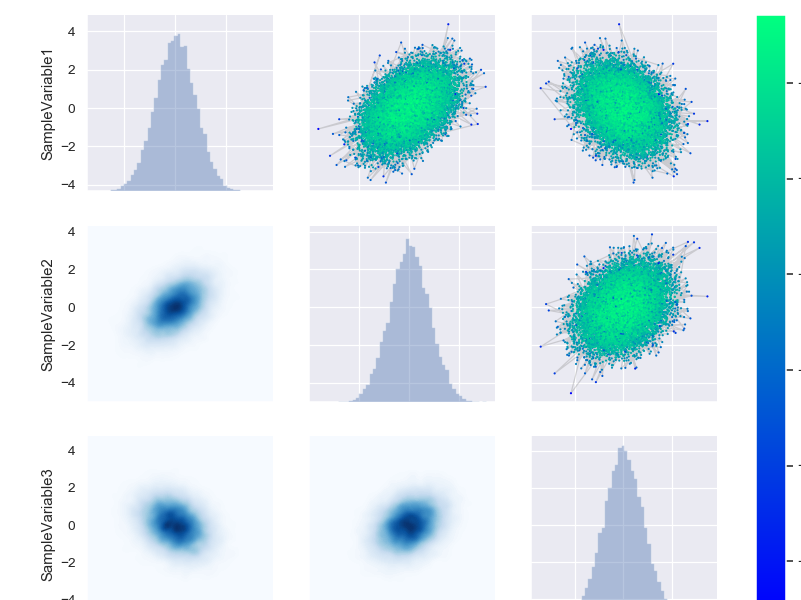

ParaDRAM - NOTE: adding the diagonal histograms (distplots)... done in 0.052103 seconds.
ParaDRAM - NOTE: adding the line/scatter plots...
ParaDRAM - NOTE:     1 out of 3: SampleVariable2 - SampleVariable1... done in 1.433945 seconds.
ParaDRAM - NOTE:     2 out of 3: SampleVariable3 - SampleVariable1... done in 1.553969 seconds.
ParaDRAM - NOTE:     3 out of 3: SampleVariable3 - SampleVariable2... done in 1.674005 seconds.
ParaDRAM - NOTE: adding kdeplots... depending on the number of plots, this may take a long while.
ParaDRAM - NOTE:     adding the lower-triangle kdeplots...done in 24.133584 seconds.


In [16]:
pmpd.sampleList[0].plot.grid()

To compute and visualize the autocorrelation of the sampler points, try,  

<IPython.core.display.Javascript object>


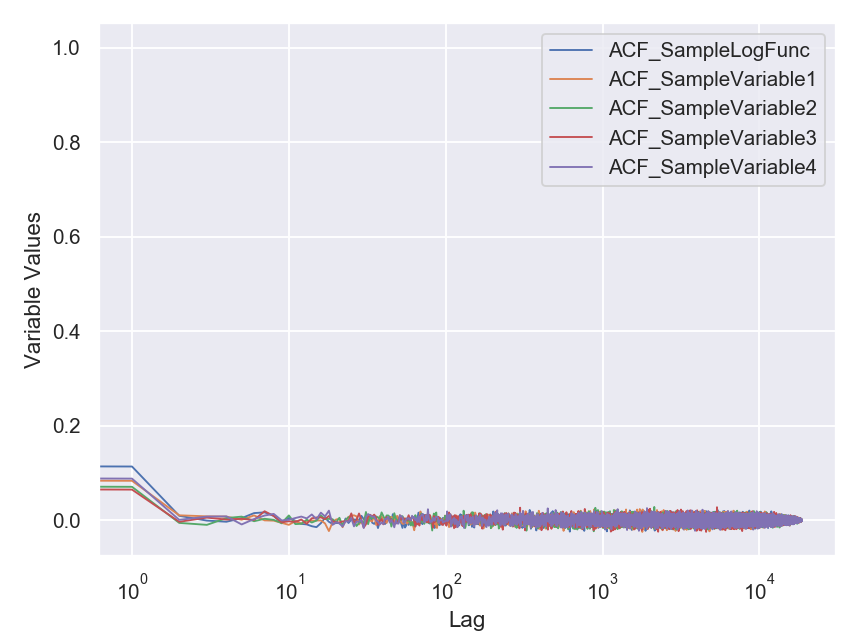

In [17]:
pmpd.sampleList[0].stats.acf()
pmpd.sampleList[0].stats.acf.plot.line()
pmpd.sampleList[0].stats.acf.plot.line.currentFig.axes.set_xscale("log")

The above AutoCorrelation plot is reassuring, since the sampled points do not appear to be correlated with each other at all. This is because the ParaDRAM routine, by default, applies as many rounds of Markov chain refinment as necessary to remove any residual correlations from the final output random sample.

To get the statistics of the maximum of the function, try,

In [18]:
print( "maxLogFunc: {}".format(pmpd.sampleList[0].stats.maxLogFunc.value) )
print( "The location of maxLogFunc: {}".format(pmpd.sampleList[0].stats.maxLogFunc.state.values) )

maxLogFunc: -2.580664
The location of maxLogFunc: [ 0.01256604 -0.11672737  0.01486946  0.11565426]


which is again reassuring, since we already know that the maximum of the standard Gaussian distribution happens at zero, which is very close to the ParaDRAM sampler's estimated location of maxLogFunc in the above.

Now, to see the effects of setting the starting point of the MCMC sampler, we will take a look at the full chain (in compact form) of uniquely sampled points form the objective function,

In [19]:
pmpd.readChain()


ParaDRAM - WARNING: delimiter is neither given as input nor set as a ParaDRAM object property.
ParaDRAM - WARNING: This information is essential for successful reading of the requested chain file(s).
ParaDRAM - WARNING: Proceeding with the default assumtion of comma-delimited chain file contents...

ParaDRAM - NOTE: 1 files detected matching the pattern: "D:\Dropbox\Projects\20180101_ParaMonte\git\example\jupyter\ParaDRAM_run_20200330_010139_686*_chain.txt"
ParaDRAM - NOTE: processing file: D:\Dropbox\Projects\20180101_ParaMonte\git\example\jupyter\ParaDRAM_run_20200330_010139_686_process_1_chain.txt
ParaDRAM - NOTE: reading file contents... done in 0.227934 seconds.
ParaDRAM - NOTE: parsing file contents... done in 0.000504 seconds.
ParaDRAM - NOTE: computing sample correlation matrix... done in 0.057651 seconds.
ParaDRAM - NOTE: computing sample covariance matrix... done in 0.048127 seconds.
ParaDRAM - NOTE: computing autocorrelations... done in 0.658609 seconds.
ParaDRAM - NOTE: ad

<IPython.core.display.Javascript object>


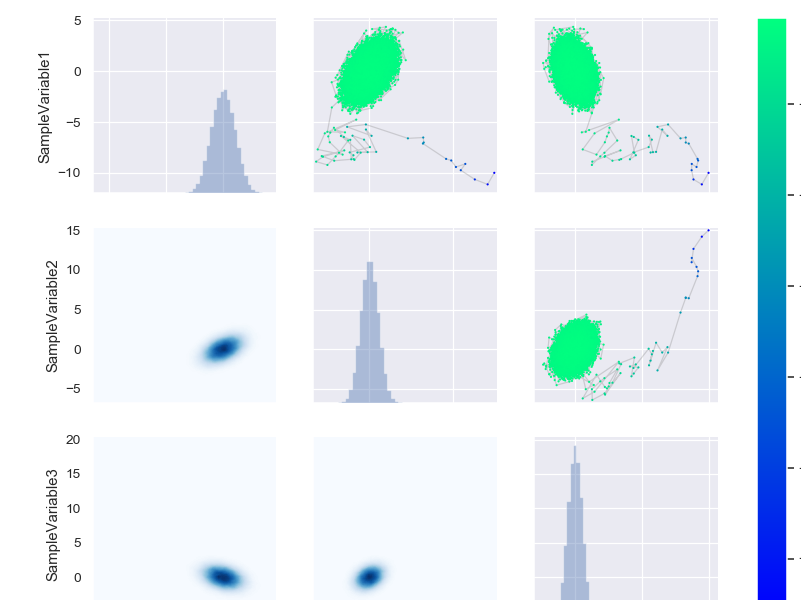

ParaDRAM - NOTE: adding the diagonal histograms (distplots)... done in 0.143422 seconds.
ParaDRAM - NOTE: adding the line/scatter plots...
ParaDRAM - NOTE:     1 out of 3: SampleVariable2 - SampleVariable1... done in 2.377248 seconds.
ParaDRAM - NOTE:     2 out of 3: SampleVariable3 - SampleVariable1... done in 2.937064 seconds.
ParaDRAM - NOTE:     3 out of 3: SampleVariable3 - SampleVariable2... done in 3.216975 seconds.
ParaDRAM - NOTE: adding kdeplots... depending on the number of plots, this may take a long while.
ParaDRAM - NOTE:     adding the lower-triangle kdeplots...done in 420.352863 seconds.


In [20]:
pmpd.chainList[0].plot.grid()

The color in the scatter plots represents the value of `logFunc` at each point. The blue color of the density plots represents the density of the sampled points at any given location.  

 We can also add targets to these plots, represnting a specific value of interest. For example, we may be interested in displaying the location of the maximum `logFunc` on these plots. This is the default value that is loaded on the targets when the `grid` object is created for the first time.

<IPython.core.display.Javascript object>


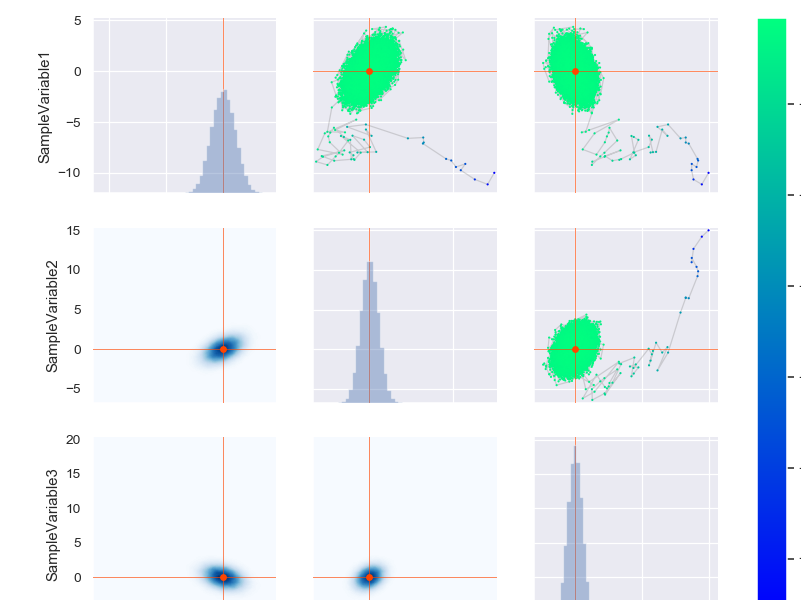

ParaDRAM - NOTE: adding the diagonal histograms (distplots)... done in 0.112307 seconds.
ParaDRAM - NOTE: adding the line/scatter plots...
ParaDRAM - NOTE:     1 out of 3: SampleVariable2 - SampleVariable1... done in 1.988386 seconds.
ParaDRAM - NOTE:     2 out of 3: SampleVariable3 - SampleVariable1... done in 2.064977 seconds.
ParaDRAM - NOTE:     3 out of 3: SampleVariable3 - SampleVariable2... done in 2.515041 seconds.
ParaDRAM - NOTE: adding kdeplots... depending on the number of plots, this may take a long while.
ParaDRAM - NOTE:     adding the lower-triangle kdeplots...done in 441.549157 seconds.


In [22]:
pmpd.chainList[0].plot.grid()
pmpd.chainList[0].plot.grid.addTarget()

To compute and plot the autocorrelation of the compact chain, try, 

<IPython.core.display.Javascript object>


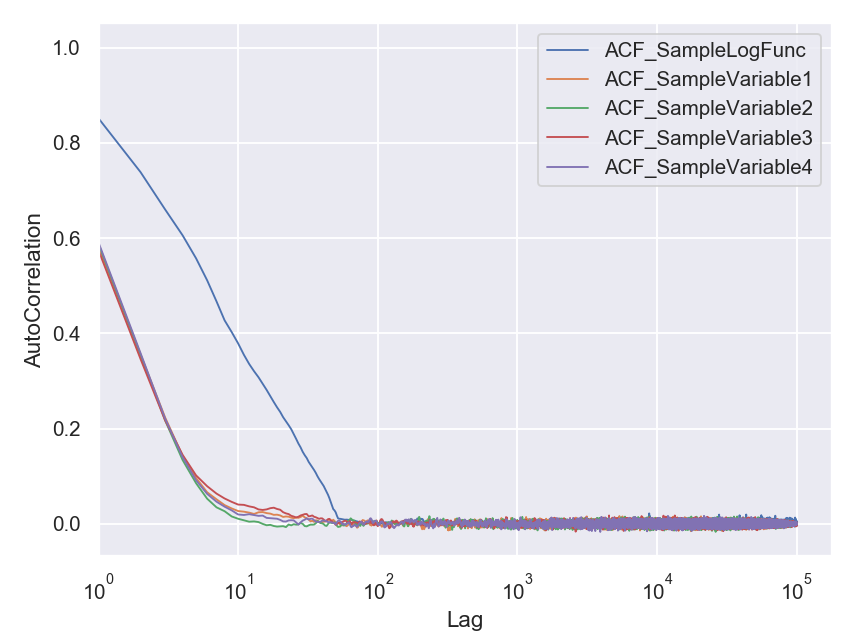

C:\Users\shahmoradia\AppData\Local\Continuum\anaconda3\lib\site-packages\paramonte\_LinePlot.py:515: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  _plt.tight_layout()


(1, 177826.07381097844)

In [27]:
pmpd.chainList[0].stats.acf.plot.line()
pmpd.chainList[0].stats.acf.plot.line.currentFig.axes.set_ylabel("AutoCorrelation")
pmpd.chainList[0].stats.acf.plot.line.currentFig.axes.set_xscale("log")
pmpd.chainList[0].stats.acf.plot.line.currentFig.axes.set_xlim(xmin=1)

As seen, even the chain of the uniquely-sampled points slightly significantly correlated with itself. The large amount of autocorrelation seen for `SampleLogFunc` is because of the fact that we started the MCMC sampling from a very bad low-probability location, as seen in the grid plots in the above.

To construct and visualize the correlation matrix of the sampled points in the chain, try, 

<IPython.core.display.Javascript object>


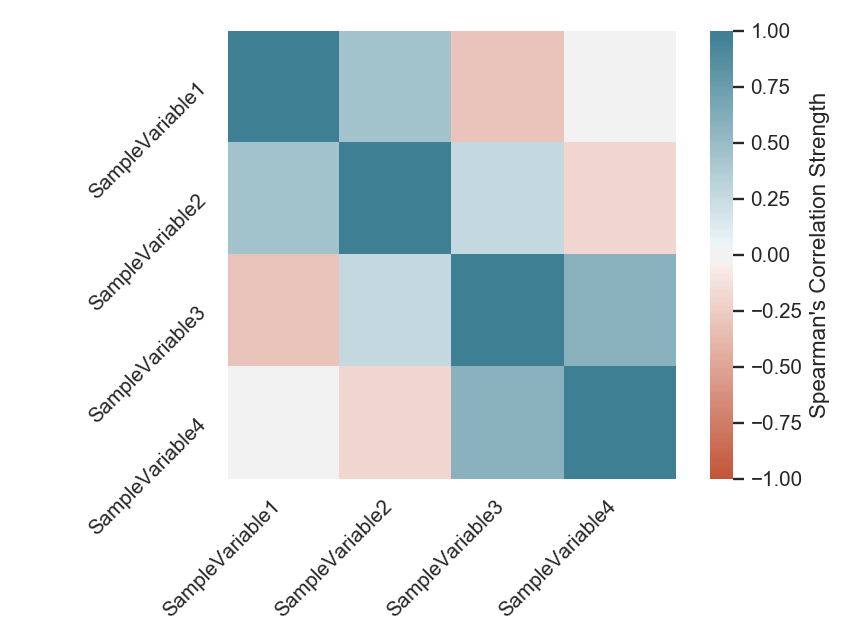

In [32]:
pmpd.chainList[0].stats.cormat(method="spearman",reself=True).plot.heatmap()

The input argument `reself` requests the function to **re**turn an instance of the **self** object as the function output. For comparison, here is the correlation matrix of the refined sampled points in the output sample file,  

<IPython.core.display.Javascript object>


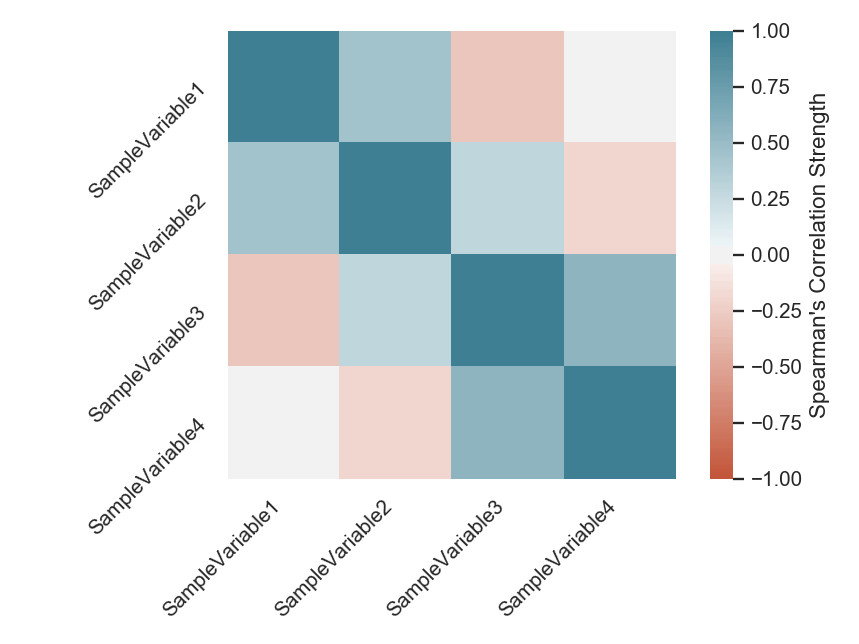

In [33]:
pmpd.sampleList[0].stats.cormat(method="spearman",reself=True).plot.heatmap()

To construct and visualize the correlation matrix of the refined sampled points in the sample file, try, 

<IPython.core.display.Javascript object>


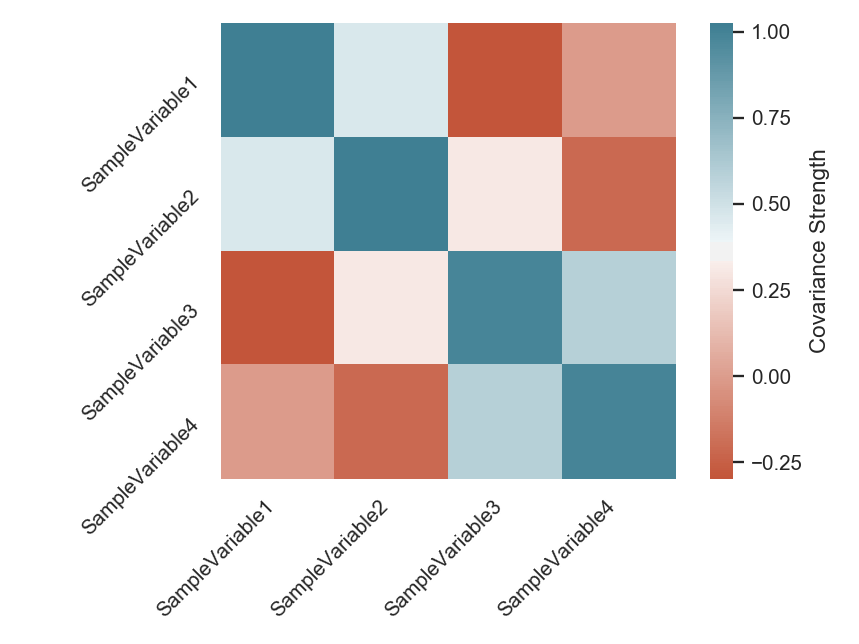

In [35]:
pmpd.sampleList[0].stats.covmat(reself=True).plot.heatmap()

## Running the simulation in parallel
As a final note, if you want to run the above simulation in parallel, you will have to save the Python scripts in an external Python file. The following code will save the relevant scripts in an external file named `main_mpi.py`,

In [7]:
with open("main_mpi.py","w") as file:
    contents = """
import numpy as np
from scipy.stats import multivariate_normal

NDIM = 4 # number of dimensions of the domain of the objective function MVN

mvn = multivariate_normal   ( mean =  [0.0,0.0,0.0,0.0]
                            , cov = [ [1.0,.45,-.3,0.0]
                                    , [.45,1.0,0.3,-.2]
                                    , [-.3,0.3,1.0,0.6]
                                    , [0.0,-.2,0.6,1.0]
                                    ]
                            )

def getLogFunc(point):
    return np.log(mvn.pdf(point))

import paramonte as pm
pmpd = pm.ParaDRAM() # define a ParaMonte sampler instance
pmpd.spec.startPointVec = [-10, 15, 20, 0]
# run the ParaDRAM sampler
pmpd.spec.progressReportPeriod = 20000
pmpd.runSampler ( ndim = 4
                , getLogFunc = getLogFunc
                , mpiEnabled = True
                )
"""
    file.write(contents)

> **Note** that we have added an additional input argument `mpiEnabled = True` to the ParaDRAM sampler routine which tells the sampler to run the simulation in parallel.

We will now run this code in parallel on 3 processors. On Linux/macOS, we would invoke the `mpiexe` launcher like the following,

In [8]:
!mpiexec -n 3 python main_mpi.py

 
************************************************************************************************************************************
************************************************************************************************************************************
****                                                                                                                            ****
****                                                                                                                            ****
****                                                         ParaMonte                                                          ****
****                                                       Version 1.0.0                                                        ****
****                                                        May 23 2018                                                         ****
****                                                               

A subdirectory or file D:\Dropbox\Projects\20180101_ParaMonte\git\example\jupyter\ already exists.


Here is a snippet from the contents of the output `*_report.txt` file generated by this parallel simulation,  
```  
 
Total number of accepted function calls (unique samples):
100000
 
 
Total number of accepted or rejected function calls:
325413
 
 
Total number of accepted or rejected or delayed-rejection (if any requested) function calls:
325413
 
 
Total number of accepted or rejected or unused function calls (by all processes, including delayed rejections, if any requested):
450366
 
 
Average MCMC acceptance rate:
0.307508227587033
 
 
MCMC sampling efficiency [ = acceptedFunctionCalls / acceptedPlusRejectedFunctionCalls ]:
0.307301798022820
 
 
MCMC sampling efficiency (including delayed rejections, if any requested) [ = acceptedFunctionCalls / acceptedPlusRejectedPlusDelayedRejectionFunctionCalls ]:
0.307301798022820
 
 
Total runtime in seconds:
11.9179999828339
 
 
Average effective time cost of each accepted function call, in seconds:
1.191799998283386E-004
 
 
Average effective time cost of each accepted or rejected function call, in seconds:
3.662422823560786E-005
 
 
Average effective time cost of each accepted or rejected or unused function call (including delayed-rejections, if any requested), in seconds:
2.646292123036344E-005
 
 
Average time cost of inter-process communications per used (accepted or rejected or delayed-rejection) function call, in seconds:
8.893315664226445E-006
 
 
Average pure time cost of each function call, in seconds:
4.101335566398428E-005
 
 
Number of processes (images):
3
 
 
Estimated maximum speedup gained via singleChain parallelization model compared to serial mode:
1.47726575482933
 
 
Predicted optimal number of physical computing processes for singleChain parallelization model, given the current MCMC sampling efficiency:
3
 
 
Predicted optimal maximum speedup gained via singleChain parallelization model, given the current MCMC sampling efficiency:
1.47726575482933
 
 
Predicted absolute optimal number of physical computing processes for singleChain parallelization model, under any MCMC sampling efficiency:
3
 
 
Predicted absolute optimal maximum speedup gained via singleChain parallelization model, under any MCMC sampling efficiency:
1.81761063742834
 
        ParaDRAM - NOTE: This simulation will likely NOT benefit from any additional computing processor beyond the predicted 
        ParaDRAM - NOTE: absolute optimal number, 3, in the above. This is true for any value of MCMC sampling efficiency.
```  

---
**As you can see, the estimated speed-up gained by running the simulation in parallel on 3 cores, compared to a serial run, was only moderate (`1.47726575482933`). This is partly due to the fact that the objective function is easy to compute and partly due to the fact that this simulation was performed on a decent fast quad-core processor.

On a Windows system using the Intel MPI runtime libraries, you may also want to add an additional `-localonly` flag to avoid the invocation of the hydra service which requires a registration of your credentials.

In [ ]:
!mpiexec -localonly -n 3 python main_mpi.py

>There are many more functionalities and features of the ParaMonte library that were neither explored nor mentioned in this example Jupyter notebook. You can explor them by checking the existing components of each atribute of the ParaDRAM sampler class and by visiting [**ParaMonte library's documentation website**](http://cdslab.org/paramonte/)